In [15]:
import matplotlib.pyplot as plt
import cvxpy as cp
import numpy as np
font = {'family' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

##Q#1_C

In [4]:
# data for satisfying minimum number of constraints problem
m = 70
k = 58
n = 12
A = np.array([[ 1.8, 0.4, 1. , 2.2, 1.9,-1. , 1. ,-0.2,-0.1, 0.4, 0.1, 1.5],
 [ 0.8, 0.1, 0.4, 0.3, 1.5,-0.2, 0.3,-0.9,-2.6, 0.7, 0.9,-0.7],
 [ 2.3,-1.5, 0. ,-0.2, 1.5, 1.5, 0.2, 0.4,-0.9,-2. ,-0.3, 0.2],
 [ 1.2, 1.2,-0.4,-0.3,-1. ,-1.4,-1.7, 2. ,-0.5,-0.4,-1.3, 0.8],
 [-1.6,-0.2,-0.9, 0.4,-0.5,-1.2,-0. , 0.4, 0.1, 0.3,-0.6,-0.4],
 [-0.7,-0.4,-0.8,-1.7, 0.2,-0.4,-1.6, 0.5,-0.9, 0.1, 0.7, 0.1],
 [ 1.1,-1.2, 0.4,-0.7,-0.9,-0.6,-0.3, 0.1,-1.2, 0.9, 0.5,-1.5],
 [ 1.5, 1.9, 1.2,-0.2,-1.1, 1.1,-0.4, 1.2, 0.2, 1. , 0.4, 0.7],
 [ 0. , 1.8, 0.1, 0.4, 1.9,-1.3,-1.3, 1. ,-1.2, 1.9,-0.4,-0.7],
 [ 1.9, 1.5, 1.9, 0.9,-0.9, 1.9,-0.3, 0.8, 0.9,-0.2, 0.6, 0.9],
 [ 0.4,-1.1, 0.3, 1.3,-0.7,-0.1,-0.4, 1.8, 0.7, 0.4,-0.8, 0.5],
 [-0.7, 0. ,-0.6, 0.7, 0.6,-0.2, 0.4,-1.1,-1.5, 0.4, 0.2, 0.6],
 [ 2.4, 0.9,-0.9, 1.1,-1.3,-0.5,-0.1, 1.7,-0.7,-0.8,-0.1,-0.7],
 [ 1.1,-1.1,-1.1,-0.4,-0.5, 1.9, 0.9, 0.1,-1.2, 0.8,-1. ,-1.5],
 [ 1.2, 0.3, 0.9, 0.3, 0.9,-0.7,-1. , 0.7,-0.8,-0.7,-0.5, 0. ],
 [-0.4,-1.4,-0.6,-2.2, 0.6,-1.6,-1.1, 0.1,-0.7, 1.5,-1.3, 0.3],
 [-0. ,-1.2, 0.5,-0.2, 0.8, 0.8, 2.2, 1.3,-0.4,-0.2, 1.1, 0.7],
 [ 0.6,-1.6,-0. ,-0.7, 0.3,-0.1, 0.9, 0.3, 0.8,-0.5,-0.9,-0.4],
 [-0. , 0.4, 2.3,-0. ,-1. ,-0.3,-0.5, 0.5,-1.5, 0.1, 0.2, 0.2],
 [-0.6,-0.2,-1.4,-0.5,-0.5, 0.4,-1.2, 0.8, 1.5,-2.1, 0.4, 0.7],
 [-0.6,-0.4,-0.1,-0.3,-0.3,-1.7, 1.2, 1.1,-0.8,-1.5, 0.5,-0.6],
 [ 0.1,-0.3, 0.7, 0.7,-0.7,-1.4,-1.6, 0.6,-1.2,-0.5,-0.6,-0.1],
 [-1.9, 0.2, 0.5, 0.1,-0.3, 0.1, 0.4,-2.8, 2. , 0.4,-0.7,-0.4],
 [ 0.5,-0.1,-2. , 2.1,-0.1, 1. ,-0.7, 1.5, 0.3, 0.6,-1. , 1.2],
 [ 0.7, 1.3,-0.6,-0.5, 2.3,-1.1,-0.1, 1.1, 0.1, 0.6,-0.4, 0.4],
 [-1.3, 1.7,-0.1,-0.7, 0.7,-0.5,-1.3,-1.3, 0.7,-0.2,-0.1, 1.1],
 [-1.1,-0.7,-0.4, 0.1,-0. ,-0.3,-0.1,-0.1,-0.7,-0.8, 0.3,-0.9],
 [-1.2,-0.3,-0.2, 2.3,-0.7, 0.9, 0.7,-1.2, 0.8,-1.2,-2.7, 0.6],
 [-1.8, 0.5,-0.7, 1.7, 1.1,-0.5,-0.7,-1.2,-0.4,-0.3,-0.4, 0.2],
 [ 0.6, 0.3,-0.8,-1.4, 1.4,-0.7,-0.7,-0.5,-1.8,-0.5,-0.5, 0.6],
 [ 0.7, 0. , 0.9, 0.3,-0. , 0.2,-0.2,-0.4,-0.3,-1.1, 0.3,-1. ],
 [ 0.8,-0.2, 0. , 0.5, 0.6,-1.6,-0.2, 0.9,-1.7, 0.4,-2.3,-1. ],
 [ 0. ,-1.7,-1. ,-1.5, 1.6, 0.2, 0.6,-0.2,-0.4,-1.6,-0.3,-0.8],
 [ 0.9, 1.1, 1.5, 0.9,-0.6,-1.1, 0.8, 0.4,-1.8, 0.4, 0.8, 0.1],
 [-0.2,-0.8,-1.4, 0.8,-0.3,-0.2, 1.7, 0.7, 0.4, 0.1, 1.5, 1.7],
 [ 0.9, 0.6,-2.1, 0.1,-0.1, 0.1, 0.9,-2.7,-0.6, 0.3,-0.5,-1.4],
 [ 0.9, 0.3,-1. , 0.3, 0.8, 0. , 0.8, 0.1,-0.4,-1.2,-0.1, 0.2],
 [ 0.9,-0.1, 0.5,-1. ,-0.8,-0.1,-1.1, 0.8, 0.5, 0.3, 0.3, 2. ],
 [-0.5,-2.2, 0.2,-0.1,-0.5,-1. ,-0.4, 0.2,-0.5, 2.4,-1. ,-0.8],
 [-2.3, 0.3,-2. ,-0.5,-0.3,-0.7, 1.7, 1. , 1.3,-0.9, 1.1, 0.5],
 [ 0.8, 1. ,-0.9,-0.4, 0.9,-2.7, 1.5, 0.6,-0. , 0.2,-1. ,-0.3],
 [ 1.1, 1.3, 2.7,-0.1,-0.7,-0.5,-1. ,-0.1, 0.4,-0. , 1.1,-0.2],
 [-0.3,-0.6,-1.6,-1.6,-1.2, 1.3, 0.9, 1.4,-1.3,-2. ,-0.7, 0.2],
 [ 0.5, 1. , 0.3, 1.7,-0.2,-0.9,-1.7,-0.9, 0.2,-0.9, 0.9, 1.4],
 [-2.4, 0.9,-2.2, 0.4, 1.2, 0.1,-1.3,-0.6,-0.3,-0.2,-0.2,-0.1],
 [ 0.2,-1.2,-0.2, 1.5,-0.4,-0.4, 1.1,-2.6, 1.2,-0.6, 0.2, 0.1],
 [ 0.9,-0.3,-0.7, 1.3,-2.4, 0. ,-1.3,-0.8, 2. ,-0. , 0.2,-1.8],
 [-0.7, 0.2, 0.4, 0.6, 0. , 0.5, 0.5,-1.8, 0. , 0.8, 0.6,-0.4],
 [-0.8,-1.1,-0.1, 1.1,-2. ,-0.7,-1.1, 0.8,-0.6,-0.5,-0.2, 0.4],
 [-0.4,-3. , 0.5, 0.4,-0.2,-1.1, 0.4, 0.4,-0.5,-0.2,-0.9,-0.2],
 [-1.6, 0.4,-0.9, 0.2,-1.4,-0.6,-0.1,-1.7, 0.1,-0.4,-1.7,-1.3],
 [ 0.6, 0.9,-0.1, 0.4, 0.2, 0.3, 1.3,-1.5, 0.7,-0.4,-0.2,-0.3],
 [-0.4,-1.2, 0.2, 1.7,-0.1,-0. ,-0.7,-0.1, 0.5,-0.4,-0.5, 0.4],
 [-0.9, 0.3, 0.8, 1.4,-0.1, 1.4, 1. ,-1. ,-1.2,-0.3, 1. ,-0.1],
 [-0.6, 1.6, 0.3,-2.3, 0.3, 0.5, 0.2, 0.4,-0.1,-1.3,-0.4,-0.9],
 [-0.9,-1.3, 0.5, 0.1,-0.4,-0.6,-0. , 1.1,-2. , 0.4,-0.5,-1.9],
 [-1.9,-0.9, 0.2, 0.4,-0.9, 1. , 1.4, 0.4,-0.6, 1.1, 0.8, 0.9],
 [-0.7,-2.8, 2.1,-1.6,-0. , 2.4, 0.3, 0.9,-1.5,-1.8,-0.5, 1.1],
 [-0.3,-0.8, 0.2, 1.1,-1.4,-1.2,-0.8, 1.1, 0.2, 2.1, 0.9,-0. ],
 [ 1.3, 0.2,-0.7, 0.7,-0.7,-0.3, 1.3,-0.1,-0.8,-0.5, 1. ,-0.6],
 [-0.4,-0.5, 0.2,-0.4,-1.6,-0.9,-0.9, 1.2, 0.8, 0.6,-0.5,-0.8],
 [-0.5,-1.1, 2.5,-2.2, 0.6,-1.3,-0.1,-1. ,-1.2,-1.1, 1.8,-0.1],
 [-0.8, 0.6, 0. , 0.7,-1.8, 0.3, 0.8,-1.7, 0.4, 1.7,-0. , 0.8],
 [ 0.7,-0.7, 0. ,-1.6,-0.5, 0.3, 0.7, 0. , 0.7,-1.1,-0.1, 0. ],
 [ 1.8,-0.2,-0.5, 0. ,-0.9, 0.2,-0.4,-1.8,-0.1,-0.3,-1.6,-0.1],
 [ 1.5, 0.5, 0.6,-1.3, 0.5, 0.1, 0.5, 0.4,-1.4,-0. ,-0.8,-0.1],
 [-0.9, 1.3,-0.9,-0.9, 0.1,-1.1,-0.4,-0.8, 1.4, 0.8,-0.1,-0.4],
 [ 0.9, 0.4, 0.5,-0. ,-1.7,-0.1,-0.5, 0.6, 1. ,-0.7, 0.5, 1.7],
 [-0.7, 1.7,-0.9, 0. ,-0. , 0. ,-0.8,-0.6,-0.7, 0.3, 0.3, 2.2],
 [ 1.4,-0.5, 0.3, 1. , 0. ,-0.1, 0.1, 0.9,-0.8,-0.3, 0.5, 0.3]])
b = np.array([ 1.7, 0.9, 0.6,-0.2, 0.5,-2. , 0.2,-0.9, 0.8,-0.2, 0.9, 0.6, 0.6, 1.2,
  0.9,-0.4,-0.4, 0.7, 0.4,-2. ,-0.1, 1. , 0.9, 0.6,-0.2,-1.1, 0.3, 3.2,
  1.2,-0.3, 0.7, 2.8,-0.1, 0.9,-1.4, 1.1, 0.3,-1.8, 1.3,-2. , 0.8,-0.4,
 -0.9,-0.3,-0.4, 1.3, 0.3, 0.5, 0.3, 1.6, 1.6, 0.8, 1.2, 0.9,-0.9, 1.5,
 -0.3, 0. ,-0.3, 0.3,-0.2,-1.3, 0.2,-0.8, 1.4, 0.5,-0.9,-1.4,-1.3, 0.4])
c = np.array([ -2.5,  1.5,  4.7, -4. ,  0.5,  5.9,  0.2, -0.9, 10.6, -1.2,  7.6, -3.6])

In [25]:
x = cp.Variable(n)
lagransian_mul = cp.Variable()

constraints = [
               cp.sum(cp.pos(lagransian_mul + A * x - b)) <= (m - k) * lagransian_mul,
               lagransian_mul >= 0
]

problem = cp.Problem(cp.Minimize(c.T * x), constraints)
problem.solve()

print("Optimal value of lambda: {}".format(1 / lagransian_mul.value))
print("Objective value: {}".format(problem.value))
print("Number of constraints satisfied: {} > {} = k".format(
    np.count_nonzero(A.dot(x.value.T) - b <= 1e-5),
    k
))

Optimal value of lambda: 282.9846637002225
Objective value: -8.45446494357385
Number of constraints satisfied: 66 > 58 = k


In [26]:
smallest_k_vals = np.argsort(A.dot(x.value.T) - b)[:k]

constraints = [
               A[smallest_k_vals] * x <= b[smallest_k_vals]
]

problem = cp.Problem(cp.Minimize(c.T * x), constraints)
problem.solve()

print("Objective after choosing k constraints: {}".format(problem.value))

Objective after choosing k constraints: -8.862461102090625


##Q#5

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


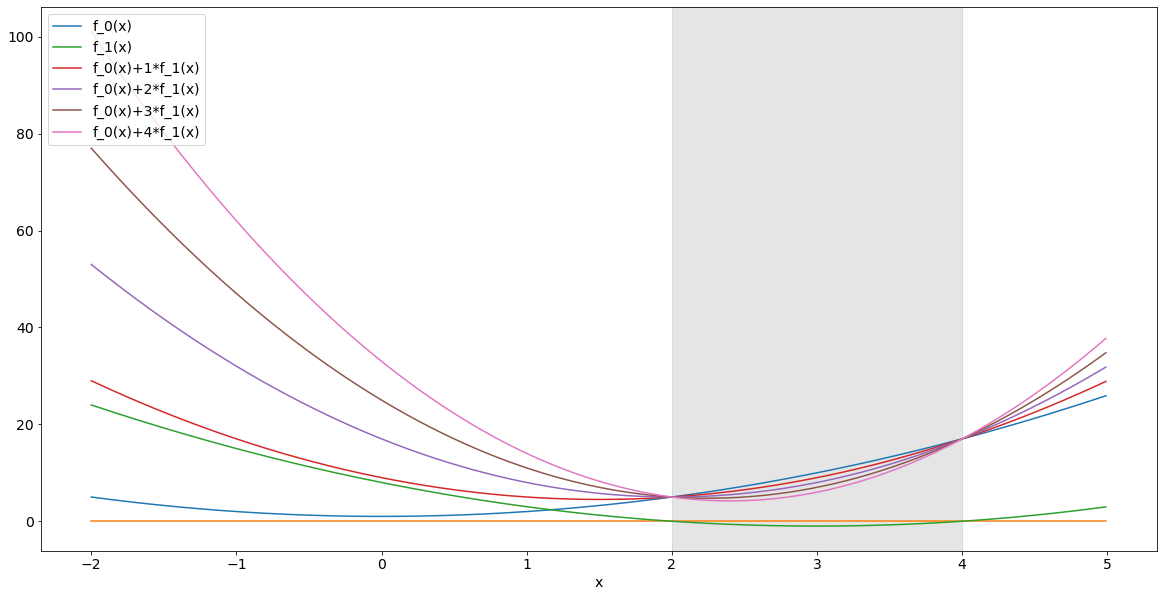

In [27]:
x = np.arange(-2., 5., 0.01)
zeors = np.zeros_like(x)
lambda_range = np.arange(1., 5., 1)

plt.plot(x, x**2+1, label='f_0(x)')
plt.plot(x, zeors)
plt.plot(x, (x-2)*(x-4), label='f_1(x)')
plt.axvspan(2, 4, alpha=0.1, color='black')
for lambda_val in lambda_range:
  plt.plot(
      x,
      (1+lambda_val) * x**2 - 6 * lambda_val *x + 1 + 8 * lambda_val,
      label=f'f_0(x)+{int(lambda_val)}*f_1(x)'
  )
plt.legend(loc="upper left")
plt.xlabel('x')
plt.gcf().set_size_inches(20, 10)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


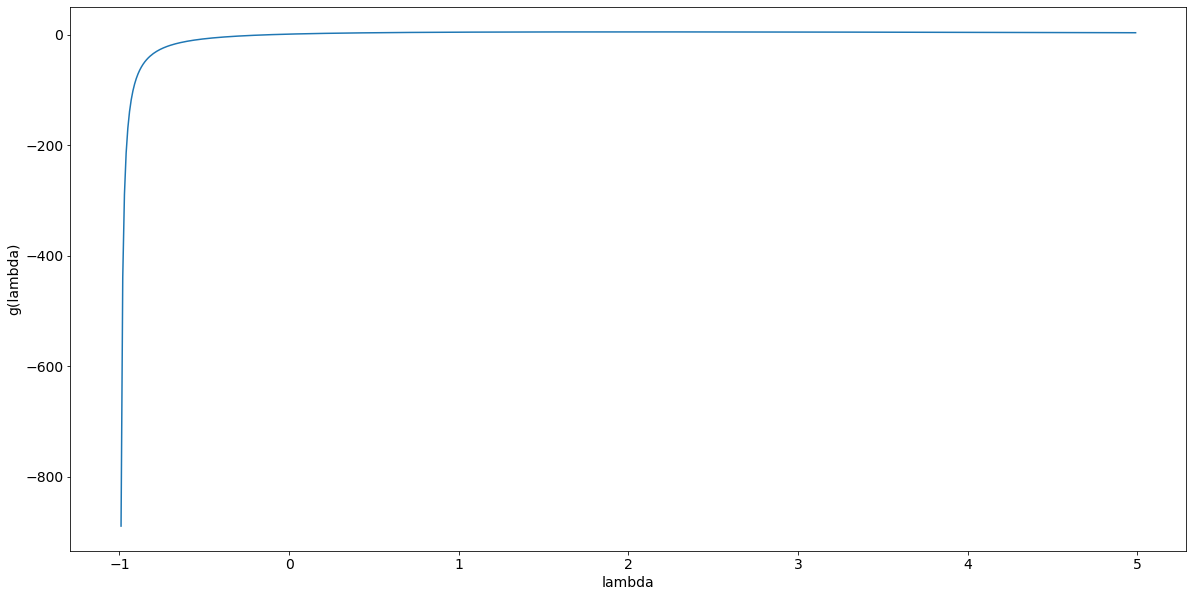

In [35]:
lambda_vals_0 = np.arange(-2., -1.01, 0.01)
lambda_vals_1 = np.arange(-1., 5., 0.01)

g_lambda_0 = lambda_vals_0 / (lambda_vals_0 - lambda_vals_0)
g_lambda_1 = -9 * lambda_vals_1**2 / (1 + lambda_vals_1) + 1 + 8 * lambda_vals_1

lambda_vals = np.concatenate([lambda_vals_0, lambda_vals_1])
g_lambda = np.concatenate([g_lambda_0, g_lambda_1])
plt.plot(lambda_vals, g_lambda)
plt.gcf().set_size_inches(20, 10)
plt.xlabel("lambda")
plt.ylabel("g(lambda)")
plt.show()